In [546]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ggplot import *
from altair import *
import seaborn as sbn
import random as rand

# Question: How does salary compare between degrees across engineering disciplines and against salaries of all fields?

### This first dataset comes from SESTAT (Scientists and Engineers Statistical Data System, Integrated Survey Data 2013.
* A large survey is collected from recent graduates with follow-up every few years that chronicles demographics, education, and employment/employer information for each field.
* For this particular dataset, I first thought that grabbing the number of people in each field at each degree level for each salary tier would be a good idea to work with.
* Salaries are given in increments of 1000USD, all the way up to 150000+USD.

In [492]:
wages_dist = pd.read_excel("sestat_wages_dist.xlsx", header = [0,1], na_values = ".").fillna(0)
wages_dist.head()

Postsecondary teachers - computer and math sciences                    \
                                               Bachelors Masters Doctorate   
0                                                   0.0      0.0      11.0   
1000                                              146.0      0.0       0.0   
2000                                              523.0    265.0       0.0   
3000                                               76.0    251.0     177.0   
4000                                                0.0    978.0       0.0   

            Computer, information, and mathematical scientists           \
      Total                                         Bachelor's Master's   
0      11.0                                             9569.0   1376.0   
1000  146.0                                             4811.0   1446.0   
2000  788.0                                              501.0   3815.0   
3000  503.0                                             2629.0    360.0   
4000  978.0                                              789.0   2634.0   

                                   Biological and medical scientists    ...    \
     Doctorate Professional  Total                         Bachelor's   ...     
0        722.0        218.0  11885                               82.0   ...     
1000     327.0          0.0   6584                              180.0   ...     
2000       0.0          0.0   4316                               45.0   ...     
3000     162.0          0.0   3150                             1402.0   ...     
4000      47.0          0.0   3470                              177.0   ...     

     Other non-S&E occupations                                          \
                     Bachelor's Master's Doctorate Professional  Total   
0                       71135.0  22528.0    1803.0       4279.0  99746   
1000                    53130.0  10258.0     879.0        261.0  64529   
2000                    37425.0  13053.0     675.0       1393.0  52546   
3000                    48050.0  11546.0     118.0       1710.0  61424   
4000                    31413.0  18965.0     284.0        343.0  51004   

         Total                                         
     Bachelors Masters Doctorate Professional   Total  
0       122716   67917      5572      15859.0  212064  
1000     92509   26092      2327        692.0  121620  
2000     93702   38883      1910       1393.0  135888  
3000     77980   23539      1282       3795.0  106597  
4000     61021   34588      2461       1021.0   99091  

[5 rows x 137 columns]

### Multi-Level Index and Columns...Fun!

In [493]:
wages_dist.keys()

MultiIndex(levels=[['Biological and medical scientists ', 'Chemical engineers', 'Chemists, except biochemists ', 'Civil engineers', 'Computer, information, and mathematical scientists', 'Economists ', 'Electrical, electronic, and computer hardware engineers', 'Health-related occupations ', 'Mechanical engineers', 'Other S&E-related occupations ', 'Other engineers', 'Other life and related scientists ', 'Other management-related occupations ', 'Other non-S&E occupations ', 'Other physical and related scientists ', 'Other social scientists ', 'Physicists and astonomers ', 'Postsecondary teachers - computer and math sciences', 'Postsecondary teachers - engineering ', 'Postsecondary teachers - life and related sciences ', 'Postsecondary teachers - physical and related sciences ', 'Postsecondary teachers - social and related sciences ', 'Psychologists ', 'S&E managers ', 'S&E pre-college teachers ', 'Teachers, except S&E postsecondary ', 'Top and Mid-level managers, executives, administrato

### Changed the index to a column called 'Wages' so that I could plot specific values, as well as converted the last group '150000 or more' to an int of 150000, and removed the last row, which is just a sum total row.

In [494]:
wages_dist= wages_dist.reset_index(level=0).rename(columns={'index':'Wages'})
wages_dist.ix[150,'Wages'] = int(wages_dist.ix[150,'Wages'].replace('150,000 or more','150000'))
wages_dist = wages_dist.drop(wages_dist.index[151])

/usr/local/lib/python3.5/site-packages/pandas/core/internals.py:3569: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  block = self.blocks[self._blknos[i]]


### Filter by just engineering fields.

In [495]:
engineer_wages = wages_dist[['Wages','Chemical engineers', 'Civil engineers', 'Electrical, electronic, and computer hardware engineers','Mechanical engineers','Other engineers']]
engineer_wages                          

Wages Chemical engineers                                         \
                     Bachelors Masters Doctorate Professional   Total   
0         0                0.0     0.0      31.0          0.0    31.0   
1      1000                0.0     0.0      52.0          0.0    52.0   
2      2000                0.0     0.0       0.0          0.0     0.0   
3      3000               42.0     0.0       0.0          0.0    42.0   
4      4000                0.0     0.0       0.0          0.0     0.0   
5      5000                0.0     0.0       0.0          0.0     0.0   
6      6000                0.0     0.0       0.0          0.0     0.0   
7      7000                0.0     0.0       0.0          0.0     0.0   
8      8000                0.0     0.0      28.0          0.0    28.0   
9      9000                0.0     0.0       0.0          0.0     0.0   
10    10000              162.0     0.0       0.0          0.0   162.0   
11    11000               34.0     0.0       0.0          0.0    34.0   
12    12000                0.0   155.0       0.0          0.0   155.0   
13    13000                0.0     0.0       0.0          0.0     0.0   
14    14000                0.0     0.0       0.0          0.0     0.0   
15    15000                0.0     0.0       0.0          0.0     0.0   
16    16000                0.0     0.0       0.0          0.0     0.0   
17    17000                0.0     0.0       0.0          0.0     0.0   
18    18000                0.0     0.0       0.0          0.0     0.0   
19    19000                0.0     0.0       0.0          0.0     0.0   
20    20000              167.0   438.0      70.0          0.0   675.0   
21    21000                0.0     1.0       0.0          0.0     1.0   
22    22000                0.0   205.0      29.0          0.0   233.0   
23    23000                8.0     1.0       0.0          0.0     8.0   
24    24000              399.0    48.0       0.0          0.0   446.0   
25    25000              196.0   139.0       0.0          0.0   335.0   
26    26000              165.0   166.0       0.0          0.0   331.0   
27    27000                0.0     0.0       0.0          0.0     0.0   
28    28000               83.0     0.0       0.0          0.0    83.0   
29    29000              136.0    26.0      51.0          0.0   213.0   
..      ...                ...     ...       ...          ...     ...   
121  121000               50.0    74.0      30.0          0.0   155.0   
122  122000               41.0    32.0      64.0          0.0   138.0   
123  123000                0.0    64.0       0.0          0.0    64.0   
124  124000              130.0     0.0     130.0          0.0   261.0   
125  125000              195.0   155.0      58.0          0.0   409.0   
126  126000              177.0    94.0      37.0          0.0   308.0   
127  127000                0.0     0.0       0.0          0.0     0.0   
128  128000              331.0     0.0      50.0          0.0   381.0   
129  129000              430.0   153.0      32.0          0.0   616.0   
130  130000              433.0   200.0     336.0          0.0   969.0   
131  131000               48.0     0.0      71.0          0.0   119.0   
132  132000             1517.0    46.0      36.0          0.0  1599.0   
133  133000                6.0     0.0       0.0          0.0     6.0   
134  134000               54.0     0.0      42.0          0.0    96.0   
135  135000              606.0    33.0     175.0          0.0   814.0   
136  136000               49.0     0.0      38.0          0.0    87.0   
137  137000                0.0     0.0      58.0          0.0    58.0   
138  138000                0.0     0.0       0.0          0.0     0.0   
139  139000                0.0     0.0       0.0          0.0     0.0   
140  140000              440.0    73.0     228.0          0.0   741.0   
141  141000                0.0     0.0      31.0          0.0    31.0   
142  142000                0.0     0.0      67.0          0.0   

### I decided that for now I would just compare the total amount of engineers at each income tier to see what the distribution looks like, and from there perhaps compare across degrees after I figure out how the general procedure works.

In [496]:
# For each engineer discipline, grab only the sub-level called "Total", drop the sub-level header "Total", 
# add a new column that is the sum of all the engineering totals of all degrees.
engineer_totals = engineer_wages.loc[:,engineer_wages.columns.get_level_values(1) == 'Total']
engineer_totals['Wages','Total']= engineer_wages['Wages']
engineer_totals.columns = engineer_totals.columns.droplevel(1)
engineer_totals['Total number'] = engineer_totals.iloc[:,0:5].sum(axis=1)
engineer_totals

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Chemical engineers,Civil engineers,"Electrical, electronic, and computer hardware engineers",Mechanical engineers,Other engineers,Wages,Total number
0,31.0,322.0,867.0,200.0,622.0,0,2042.0
1,52.0,1114.0,0.0,110.0,824.0,1000,2100.0
2,0.0,162.0,60.0,30.0,1354.0,2000,1606.0
3,42.0,1656.0,476.0,14.0,168.0,3000,2356.0
4,0.0,0.0,607.0,0.0,35.0,4000,642.0
5,0.0,0.0,0.0,0.0,592.0,5000,592.0
6,0.0,0.0,38.0,0.0,113.0,6000,151.0
7,0.0,230.0,0.0,619.0,0.0,7000,849.0
8,28.0,186.0,0.0,0.0,402.0,8000,616.0
9,0.0,174.0,276.0,34.0,16.0,9000,500.0


### I calculated the probability for each wage tier and assigned it so that I could then plot the distribution. Not as easy as just plotting a ggplot density since I have a two-array system of data.

In [497]:
sum_total = engineer_totals['Total number'].sum()
engineer_totals['Prob'] = engineer_totals['Total number'] / sum_total
engineer_totals.head()

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Chemical engineers,Civil engineers,"Electrical, electronic, and computer hardware engineers",Mechanical engineers,Other engineers,Wages,Total number,Prob
0,31.0,322.0,867.0,200.0,622.0,0,2042.0,0.001341
1,52.0,1114.0,0.0,110.0,824.0,1000,2100.0,0.001379
2,0.0,162.0,60.0,30.0,1354.0,2000,1606.0,0.001055
3,42.0,1656.0,476.0,14.0,168.0,3000,2356.0,0.001548
4,0.0,0.0,607.0,0.0,35.0,4000,642.0,0.000422


### I used the line plot in ggplot to plot the probability versus income tier, but it is easier to see in the next plot.

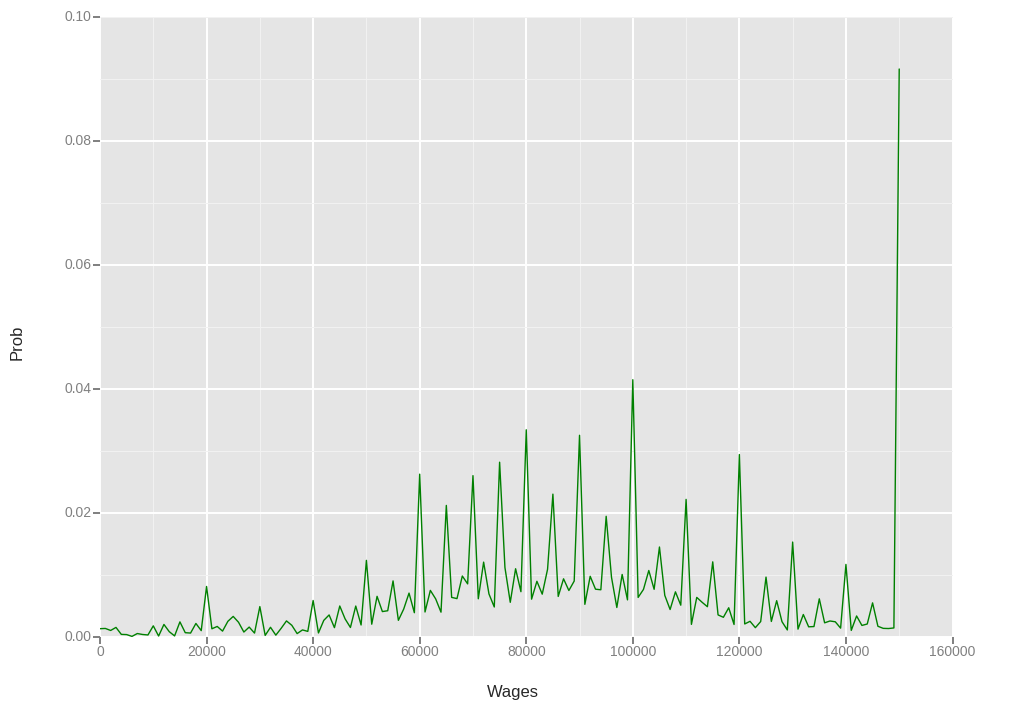

<ggplot: (-9223363286875706585)>

In [553]:
ggplot(aes(x='Wages',y='Prob'), data=engineer_totals) + geom_line(color='green')

### Altair's binning capabilities with a bar chart make it easier to compare the tier groups, though its data-scale for the probability uses, for example, '100m' for '0.1' in terms of the probability.
* The general distribution seems to have its mean around 100-120k USD, but what is worrisome is that large peak at the 150k+ area. I wouldn't expect the highest proportion of engineers to have a salary in excess of 150k.

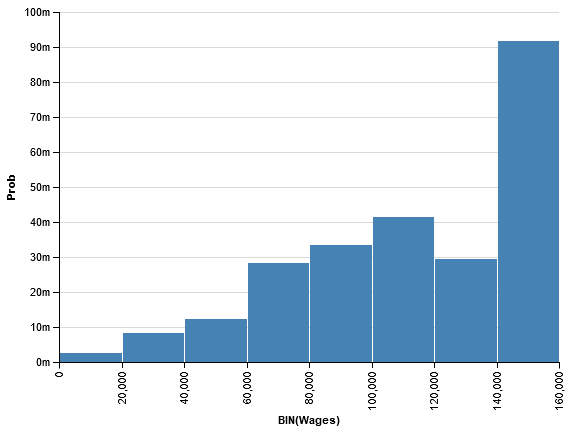

In [555]:
Chart(engineer_totals).mark_bar().encode(
    x=X('Wages',bin=True),
    y='Prob:Q',
    title
    )

In [502]:
total_wages = wages_dist[['Wages','Total']]
total_wages = total_wages.loc[:,total_wages.columns.get_level_values(1) == 'Total']
total_wages['Wages','Total']= engineer_wages['Wages']
total_wages.columns = total_wages.columns.droplevel(1)
sum_total = total_wages['Total'].sum()
total_wages['Prob'] = total_wages['Total'] / sum_total
total_wages.head()


,Total,Wages,Prob
0,212064,0,0.009002
1,121620,1000,0.005163
2,135888,2000,0.005768
3,106597,3000,0.004525
4,99091,4000,0.004206


### I did the same as the previous except I applied it to the combination of all fields.
* The mean for all fields is closer to the 55-60k mark, but again, there is the alarmingly high percentage of people with salaries above 150k.

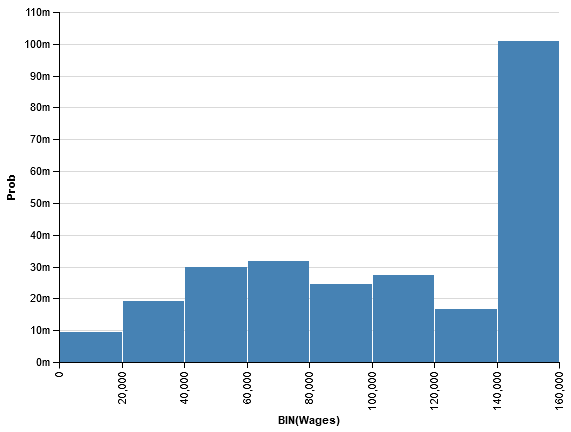

In [538]:
Chart(total_wages).mark_bar().encode(
    x=X('Wages',bin=True),
    y='Prob:Q')
    

### It was interesting to compare this data, but my primary goal was to compare how salaries across degrees of engineering and all occupations compare.
* I utilized another SESTAT dataset where I collected the data on highest degree earned, median salary of primary job, number of individuals within the particular field by degree, and all fields of degrees earned.
* This will not be perfect, because it assumes that one's highest degree is in the field of their primary job, but for many people, this is a good approximation.
* Not all fields have professional licensures, but for those that do, there were not a defining metric as to what is considered professional.

In [565]:
data_by_deg = pd.read_excel("sestat_wages_by_degree.xlsx", header=[0,1], na_values=".").fillna(0)
data_by_deg

Postsecondary teachers - computer and math sciences           \
                                                  Weighted Count   Median   
Bachelors                                               24150.0   13000.0   
Masters                                                 49164.0   37000.0   
Doctorate                                               35387.0   80000.0   
Professional                                                0.0       0.0   
All degrees                                            108702.0   41000.0   

             Computer, information, and mathematical scientists          \
                                                 Weighted Count  Median   
Bachelors                                               1760855   80000   
Masters                                                  695010   95000   
Doctorate                                                 71383  110000   
Professional                                              11457   80000   
All degrees                                             2538705   85000   

             Biological and medical scientists         \
                                Weighted Count Median   
Bachelors                               140027  41000   
Masters                                  77581  52000   
Doctorate                               114059  71000   
Professional                             10282  80000   
All degrees                             341948  52000   

             Postsecondary teachers - life and related sciences         \
                                                 Weighted Count Median   
Bachelors                                                 12586  18000   
Masters                                                   20483  30000   
Doctorate                                                 51958  80000   
Professional                                               2669  80000   
All degrees                                               87696  62000   

             Other life and related scientists           ...    \
                                Weighted Count  Median   ...     
Bachelors                               111598   55000   ...     
Masters                                  59670   62000   ...     
Doctorate                                36289   80000   ...     
Professional                              1127  100000   ...     
All degrees                             208685   60000   ...     

             Top and Mid-level managers, executives, administrators          \
                                                     Weighted Count  Median   
Bachelors                                                855612      100000   
Masters                                                  666442      114000   
Doctorate                                                 90311      142000   
Professional                                              71958      150000   
All degrees                                             1684324      110000   

             Other management-related occupations          \
                                   Weighted Count  Median   
Bachelors                                 1060744   65000   
Masters                                    658937   85000   
Doctorate                                   37103  114000   
Professional                                37584   82000   
All degrees                               1794369   73000   

             Teachers, except S&E postsecondary         \
                                 Weighted Count Median   
Bachelors                                388580  31000   
Masters                                  531496  50000   
Doctorate                                 72029  76000   
Professional                              16683  62000   
All degrees                             1008789  45000   

             Other non-S&E occupations         All occupations          
                        Weighted Count  Median  Weighted Count  Median  
Bachelors                     

In [566]:
data_by_deg.keys()

MultiIndex(levels=[['All occupations', 'Biological and medical scientists', 'Chemical engineers', 'Chemists, except biochemists', 'Civil engineers', 'Computer, information, and mathematical scientists', 'Economists', 'Electrical, electronic, and computer hardware engineers', 'Health-related occupations', 'Mechanical engineers', 'Other S&E-related occupations', 'Other engineers', 'Other life and related scientists', 'Other management-related occupations', 'Other non-S&E occupations', 'Other physical and related scientists', 'Other social scientists', 'Physicists and astonomers', 'Postsecondary teachers - computer and math sciences', 'Postsecondary teachers - engineering', 'Postsecondary teachers - life and related sciences', 'Postsecondary teachers - physical and related sciences', 'Postsecondary teachers - social and related sciences', 'Psychologists', 'S&E managers', 'S&E pre-college teachers', 'Teachers, except S&E postsecondary', 'Top and Mid-level managers, executives, administrato

In [575]:
engineers = data_by_deg[['Chemical engineers', 'Civil engineers', 'Electrical, electronic, and computer hardware engineers','Mechanical engineers','Other engineers','All occupations']]
engineers.head()

Chemical engineers         Civil engineers          \
                 Weighted Count  Median  Weighted Count  Median   
Bachelors                 42345   95000          149814   75000   
Masters                   13322   92000           67322   85000   
Doctorate                 10006  113000            5669   95000   
Professional                 11   82000             378  150000   
All degrees               65684   95000          223184   80000   

             Electrical, electronic, and computer hardware engineers          \
                                                      Weighted Count  Median   
Bachelors                                                208983        91000   
Masters                                                  109253       104000   
Doctorate                                                 26278       125000   
Professional                                                319       114000   
All degrees                                              344833       100000   

             Mechanical engineers         Other engineers          \
                   Weighted Count  Median  Weighted Count  Median   
Bachelors                  211142   82000          367039   86000   
Masters                     76883   93000          180182  100000   
Doctorate                   12880  103000           38917  105000   
Professional                  656  108000             945   98000   
All degrees                301561   85000          587083   90000   

             All occupations          
              Weighted Count  Median  
Bachelors           16649679   58000  
Masters              8550505   70000  
Doctorate            1359728   90000  
Professional         2390465  118000  
All degrees         28950378   65000

### First, I would like to get the percentage of workers for each degree out of the total of all degrees so that when I compare the salaries I will have a baseline to see why there may be discrepancies.
* This is a multi-level index, so I have to index by the 'Weighted Count' sub-column first and then remove that header.

In [595]:
num_workers = engineers.iloc[:,(engineers.columns.get_level_values(1) == 'Weighted Count')]
num_workers.columns = num_workers.columns.droplevel(1)
num_workers.head()

,Chemical engineers,Civil engineers,"Electrical, electronic, and computer hardware engineers",Mechanical engineers,Other engineers,All occupations
Bachelors,42345,149814,208983,211142,367039,16649679
Masters,13322,67322,109253,76883,180182,8550505
Doctorate,10006,5669,26278,12880,38917,1359728
Professional,11,378,319,656,945,2390465
All degrees,65684,223184,344833,301561,587083,28950378


### Then I convert each sub-column to a percentage based on the total, i.e., by dividing by the 'All Degrees'.

In [596]:
num_workers.iloc[0:4,:] = (num_workers.iloc[0:4,:] / num_workers.iloc[4,:]) * 100.0

/usr/local/lib/python3.5/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [597]:
num_workers.head()

,Chemical engineers,Civil engineers,"Electrical, electronic, and computer hardware engineers",Mechanical engineers,Other engineers,All occupations
Bachelors,64.467755,67.125780,60.604119,70.016348,62.519099,5.751109e+01
Masters,20.281956,30.164349,31.682873,25.495008,30.691061,2.953504e+01
Doctorate,15.233542,2.540057,7.620500,4.271109,6.628875,4.696754e+00
Professional,0.016747,0.169367,0.092509,0.217535,0.160965,8.257112e+00
All degrees,65684.000000,223184.000000,344833.000000,301561.000000,587083.000000,2.895038e+07


### Finally, I plot an aggregate bar chart to compare. Matplotlib does a nice job of plotting the data in the way that I want and in a visually appealing way.

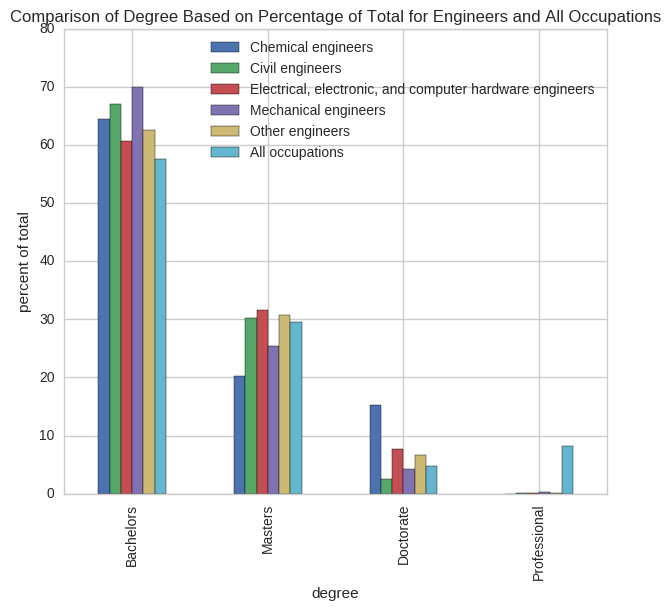

In [602]:
num_workers_percentages = num_workers.iloc[0:4,:]
num_workers_percentages.plot(figsize=(7,6),kind='bar')
plt.xlabel('degree')
plt.ylabel('percent of total')
plt.legend(loc=1)
plt.title('Comparison of Degree Based on Percentage of Total for Engineers and All Occupations')

In [568]:
wages = engineers.iloc[:, (engineers.columns.get_level_values(1) == 'Median')]
wages.columns = wages.columns.droplevel(1)


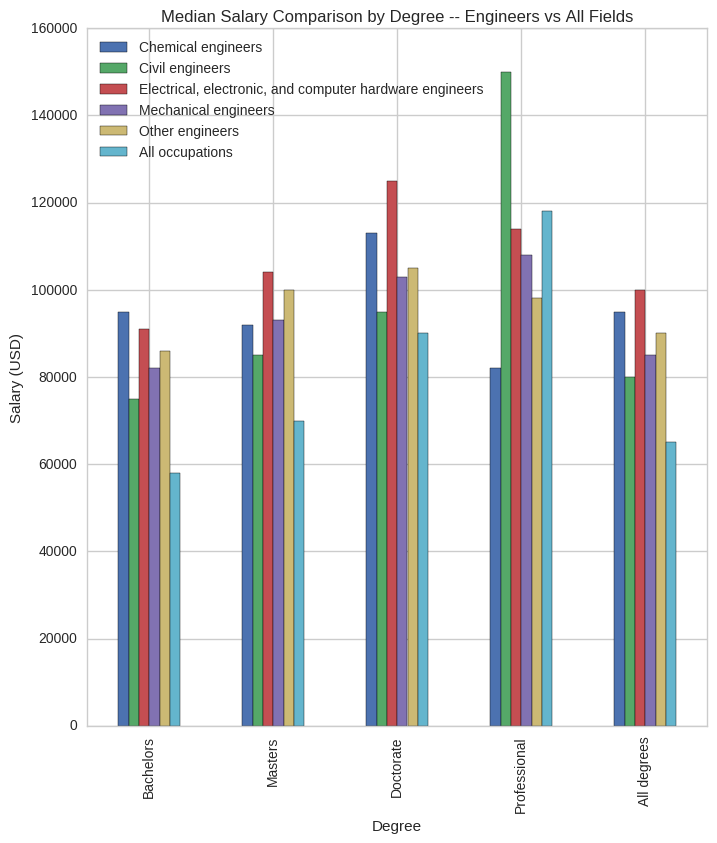

In [573]:
ax = wages.plot(figsize=(8,9),kind='bar')
ax.set_title("Median Salary Comparison by Degree -- Engineers vs All Fields")
ax.set_ylabel('Salary (USD)')
ax.set_xlabel('Degree')
ax.legend(loc=2)

* Above I have plotted the median salary by degree for several engineering fields as well as in comparison to all combined fields. 
* The data were collected from the Integrated Survey Data 2013 of the Science and Engineering Statistical Data System (SESTAT), a National Science Foundation integrated data system that collects statistics on education, employment, and demographics from college graduates every few years. 
* My methodology was to collect the data on median salary for primary job, field of degree, and highest degree earned.
* For most fields, salary increases roughly linearly with degree level, with professionals, on average, earning significantly higher salaries then any other degree, with the exception of electrical and chemical engineering. 
* Electrical engineering tends to hold the highest salaries overall, though professional civil engineers have extremely high salaries of 150k+ USD. 
* However, upon comparing the average of all degrees for the engineering fields, the medians are much closer to a Bachelor's level salary, indicative of most individuals holding at most a Bachelors degree. (Earlier, I compared the relative percentages for each degree out of the total, and for civil engineers, Bachelors account for 67% while Professionals account for 0.2%)